# 4.9 Task Part 2

### Import libraries

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

### Load the file

In [5]:
path = r'C:\Users\Marvin\Instacart Basket Analysis'
df = pd.read_pickle(os.path.join(path,'02 Data','Prepared Data','ords_prods_merged_2.pkl'))

In [6]:
df.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,time_of_day,...,order frequency flag,first_name,surname,Gender,State,Age,date_joined,dependants,family_status,income
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,28,6,11,...,Frequent customer,Charles,Cox,Male,Minnesota,81,2019-08-01,1,married,49620
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,30,6,17,...,Frequent customer,Charles,Cox,Male,Minnesota,81,2019-08-01,1,married,49620
2,907,Premium Sliced Bacon,106,12,20.0,3160996,138,1,5,13,...,Frequent customer,Charles,Cox,Male,Minnesota,81,2019-08-01,1,married,49620
3,907,Premium Sliced Bacon,106,12,20.0,2254091,138,10,5,14,...,Frequent customer,Charles,Cox,Male,Minnesota,81,2019-08-01,1,married,49620
4,1000,Apricots,18,10,12.9,505689,138,9,6,12,...,Frequent customer,Charles,Cox,Male,Minnesota,81,2019-08-01,1,married,49620


In [7]:
df.shape

(32404859, 33)

## 2. Create a bar chart, a histogram, a scatterplot, and a line chart, using a sample subset for the line chart

### Subsetting the dataframe

#### Create the list with the random numbers

In [8]:
np.random.seed(4)
dev = np.random.rand(len(df)) <= 0.7

#### Create two dataframes small: 30% big: 70%

In [9]:
big = df[dev]

In [10]:
small = df[~dev]

#### Check the lengths of the two dataframes

In [11]:
df.shape

(32404859, 33)

In [12]:
len(small)

9721098

In [13]:
len(big)

22683761

### Histogram

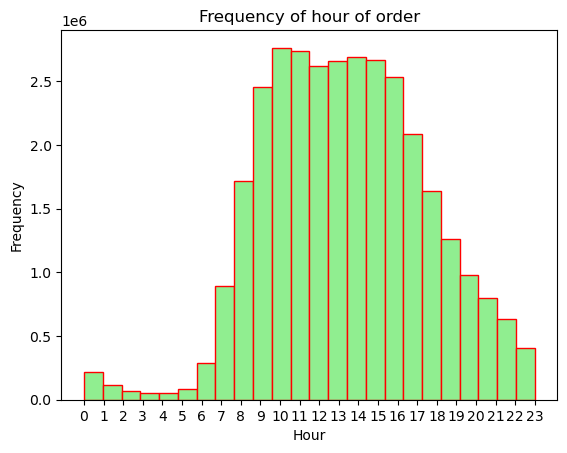

In [17]:
n,bins,patches=plt.hist(df['time_of_day'], bins=24 ,color='lightgreen', edgecolor='red')
plt.title('Frequency of hour of order')
plt.ylabel('Frequency')
plt.xlabel('Hour')
plt.xticks(np.arange(0,24,1))

# Save chart
plt.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_order_hour.png'))

#### There is a higher frequency in the hours between 10:00 and 15:00

### Bar chart

#### Group by loyalty, count unique orders

In [18]:
df_loyalty=df.groupby('loyalty_flag')['order_id'].nunique()

In [19]:
df_loyalty=pd.DataFrame(df_loyalty).reset_index()

In [20]:
df_loyalty

,loyalty_flag,order_id
0,Loyal customer,1024517
1,New customer,637048
2,Regular customer,1553120


#### Create a function to display labels

In [23]:
def show_values(axs, orient="v", space=.01):
    def _single(ax):
        if orient == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height() + (p.get_height()*0.01)
                value = '{:.1f}'.format(p.get_height())
                ax.text(_x, _y, value, ha="center") 
        elif orient == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height() - (p.get_height()*0.5)
                value = '{:.1f}'.format(p.get_width())
                ax.text(_x, _y, value, ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _single(ax)
    else:
        _single(axs)

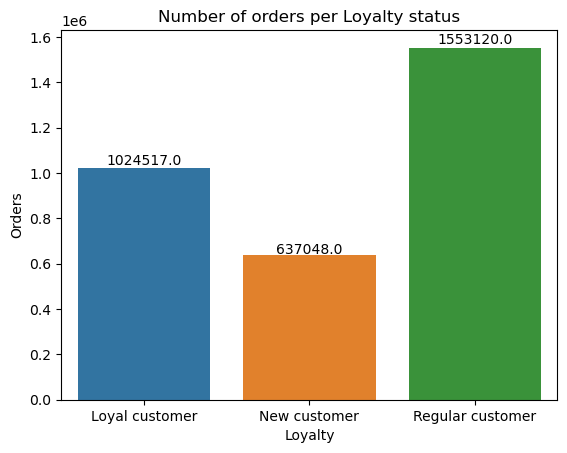

In [24]:
fig=sns.barplot(data=df_loyalty,x='loyalty_flag',y='order_id',errwidth=0)
fig.set(xlabel='Loyalty',ylabel='Orders',title="Number of orders per Loyalty status")
show_values(fig)
plt.savefig(os.path.join(path, '04 Analysis','Visualizations', 'orders_per_loyalty.png'))

#### Most of the orders are made by Regular customers, followed by Loyal customers and lastly by New customers

### Scatterplot

In [25]:
df2=df.groupby('user_id').agg({'Age':['mean'],'income':['mean']})

In [26]:
df2

,Age,income
,mean,mean
user_id,,
1,31.0,40423.0
2,68.0,64940.0
3,33.0,93240.0
4,31.0,45435.0
5,75.0,115242.0
...,...,...
206205,38.0,99402.0
206206,25.0,75041.0


#### Creating the scatterplot

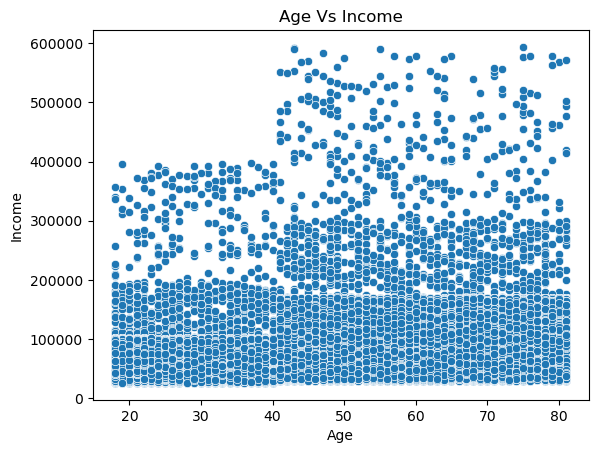

In [27]:
fig=sns.scatterplot(x=('Age', 'mean'),y=('income', 'mean'),data=df2)
fig.set(xlabel='Age',ylabel='Income',title="Age Vs Income")
plt.savefig(os.path.join(path, '04 Analysis','Visualizations', 'age_vs_income.png'))

#### There is no relationship between Age and Income

### Line chart

C:\Users\Marvin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Marvin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


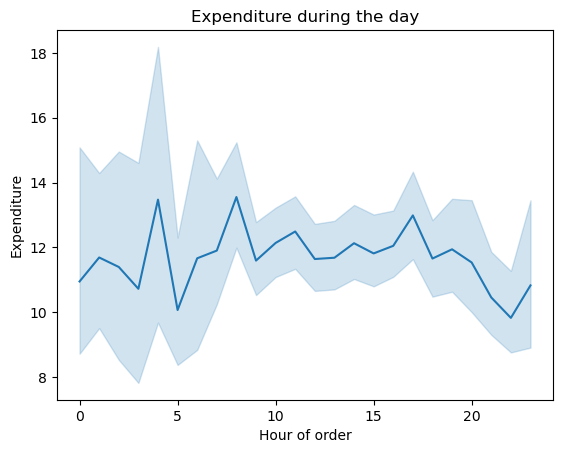

In [29]:
line=sns.lineplot(data=small,x='time_of_day',y='prices')
line.set(xlabel='Hour of order',ylabel='Expenditure',title="Expenditure during the day")
plt.savefig(os.path.join(path, '04 Analysis','Visualizations', 'prices_hours.png'))

In [31]:
df_expenditure=df.groupby('time_of_day')['prices'].sum()

In [32]:
df_expenditure=pd.DataFrame(df_expenditure).reset_index()

In [33]:
df_expenditure

,time_of_day,prices
0,0,2281125.1
1,1,1156287.5
2,2,1019750.3
3,3,680130.1
4,4,651364.0
5,5,1111937.9
6,6,3421974.7
7,7,10961331.9
8,8,21437476.7
9,9,28830061.7


In [34]:
df_expenditure.sort_values(('prices'),ascending=False)

,time_of_day,prices
11,11,33268554.8
10,10,32868237.5
15,15,32400773.8
16,16,31793097.5
14,14,31569115.4
12,12,31280439.7
13,13,30541285.8
9,9,28830061.7
17,17,26736786.6
8,8,21437476.7


C:\Users\Marvin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Marvin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


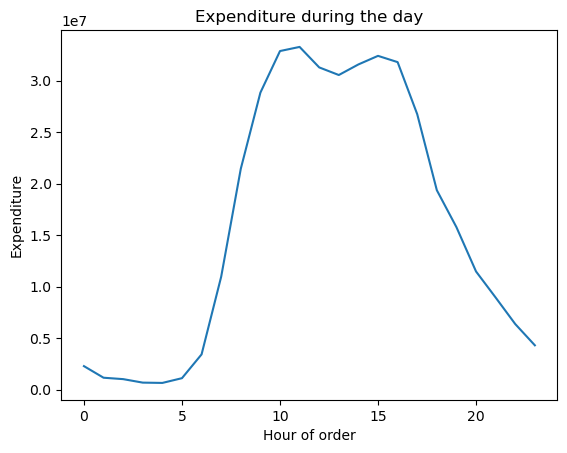

In [36]:
line=sns.lineplot(data=df_expenditure,x='time_of_day',y='prices')
line.set(xlabel='Hour of order',ylabel='Expenditure',title="Expenditure during the day")
plt.savefig(os.path.join(path, '04 Analysis','Visualizations', 'expenditure_hours.png'))

#### The peak hours are between 10:00 and 15:00